In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
nifty = pd.read_csv('../historical/NIFTY50_day.csv', parse_dates=['Date'], date_parser=dateparse)
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
vix = pd.read_csv('../historical/VIX_day.csv', parse_dates=['Date'], date_parser=dateparse)
dateparse = lambda x: datetime.strptime(x, '%m-%d-%Y')
expiries  = pd.read_csv('../historical/expiry_days_15Jan2015_12May2021.csv', parse_dates=['expDays'], date_parser=dateparse)

In [3]:
tmpNifty = nifty[nifty.Date.isin(expiries.expDays.values)]\
                    .drop_duplicates()\
                    .reset_index(drop=True)\
                    .loc[:,['Open', 'High', 'Low', 'Close']].add_prefix('nifty_')

In [4]:
tmpVix = vix[vix.Date.isin(expiries.expDays.values)]\
                    .drop_duplicates()\
                    .reset_index(drop=True)\
                    .loc[:,['Open', 'High', 'Low', 'Close']].add_prefix('vix_')

In [5]:
df = pd.concat([expiries, tmpNifty, tmpVix], axis=1)

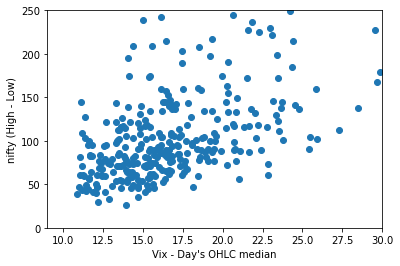

In [6]:
plt.scatter(df.iloc[:,5:].median(axis=1), df.nifty_High - df.nifty_Low)
plt.xlim([9, 30])
plt.ylim([0, 250])
plt.xlabel('Vix - Day\'s OHLC median')
plt.ylabel('nifty (High - Low)')
plt.show()

In [7]:
df2 = pd.DataFrame([df.iloc[:,5:].median(axis=1), df.nifty_High - df.nifty_Low]).T
df2.columns = ['vix_median', 'nifty_range']
df2.shape

(328, 2)

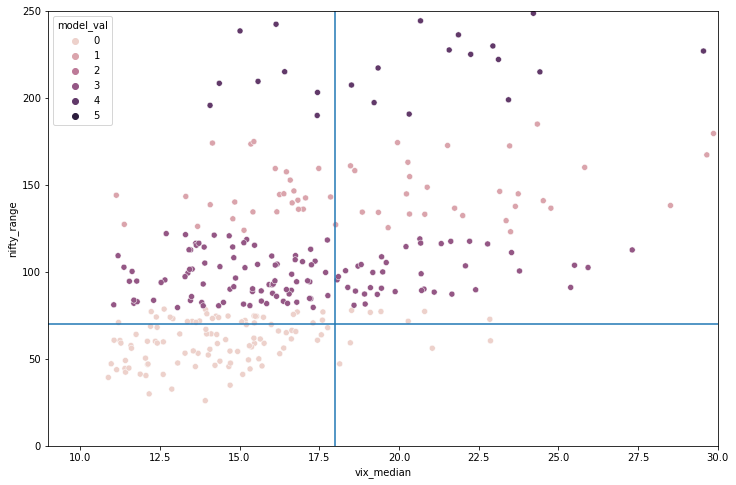

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6, random_state=0).fit(df2)

df2['model_val'] = model.labels_

fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df2, x='vix_median', y='nifty_range',hue='model_val', ax=ax)
plt.axvline(18)
plt.axhline(70)
plt.xlim([9, 30])
plt.ylim([0, 250])
plt.show()

In [9]:
df2.nifty_range.min()

26.0

#### If Vix is above 18, Nifty may be range bounded between 70 - 150
#### If Vix is below 18, Nifty may go in any range 26 - 150